In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/sample_data/house_data_fs.csv', index_col = 0)
df = df.dropna()
df1 = df.head(50)
print(df)

        price  bedrooms  sqft_living
0      221900       3.0         1180
1      538000       3.0         2570
2      180000       2.0          770
3      604000       4.0         1960
4      510000       3.0         1680
...       ...       ...          ...
21608  360000       3.0         1530
21609  400000       4.0         2310
21610  402101       2.0         1020
21611  400000       3.0         1600
21612  325000       2.0         1020

[21600 rows x 3 columns]


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df1['sqft_living'].values
y = df1['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1))

lr = LinearRegression()
model = lr.fit(X_scaled, y)

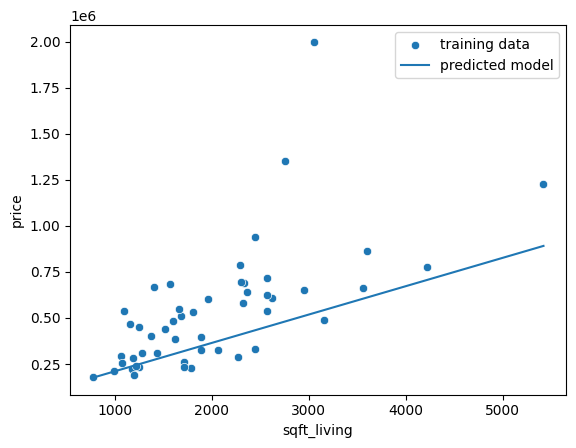

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data = df1, x="sqft_living", y="price")
x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 50)
y_model = model.predict(scaler.fit_transform(x_model.reshape(-1, 1)))

plt.plot(x_model, y_model)
plt.legend(['training data', 'predicted model'])
plt.show()

rscore: 0.4779729643583166
mse: 55715230172.05838
mae: 161830.16869961674


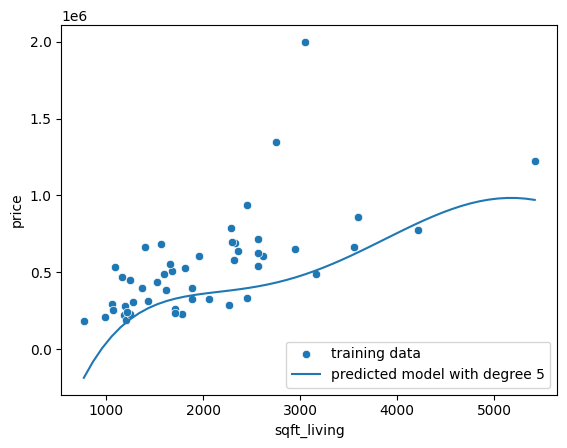

In [4]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1))

order = 5
poly = PolynomialFeatures(degree=order, include_bias=False)
poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))

lr = LinearRegression()
model = lr.fit(poly_features, y)

y_pred = model.predict(poly_features)
rscore = model.score(poly_features, y)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print("rscore:", rscore)
print("mse:", mse)
print("mae:", mae)

sns.scatterplot(data=df1, x="sqft_living", y="price")
x_model = np.linspace(df1["sqft_living"].min(), df1['sqft_living'].max(), 50)
x_model_scaled = scaler.fit_transform(x_model.reshape(-1, 1))
x_model_poly = poly.fit_transform(x_model_scaled)

y_model = model.predict(x_model_poly)
plt.plot(x_model, y_model)
plt.legend(['training data', 'predicted model with degree ' + str(order)])
plt.show()

In [5]:
import joblib
best_order = 2
X = df1['sqft_living'].values
y = df1['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1))

# Track best
best_score = -np.inf
best_model = None
best_poly = None
best_degree = None

for degree in range(1, 6):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))

    model = LinearRegression().fit(poly_features, y)
    y_pred = model.predict(poly_features)
    score = model.score(poly_features, y)

    if score > best_score:
        best_score = score
        best_model = model
        best_poly = poly
        best_degree = degree

    print("Degree", degree, "has R2 score:", round(score, 3))

print("\nBest degree:", best_degree, "with R2 score:", round(best_score, 3))
print("\nBest Model:", best_model)
joblib.dump(best_model, 'best_model.pkl')

Degree 1 has R2 score: 0.417
Degree 2 has R2 score: 0.428
Degree 3 has R2 score: 0.429
Degree 4 has R2 score: 0.449
Degree 5 has R2 score: 0.478

Best degree: 5 with R2 score: 0.478

Best Model: LinearRegression()


['best_model.pkl']